# Data Exploration and Preperation

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn import pipeline

from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
data = pd.read_csv(r'C:\Users\lenovo\OneDrive\Desktop\Projects\Kaggle-Podcast_ListenTime\SourceData\train.csv')
data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [4]:
data[data['Podcast_Name'] == "Joke Junction"]['Episode_Title']

1         Episode 26
179       Episode 47
283       Episode 19
533       Episode 23
534       Episode 24
             ...    
749736    Episode 15
749776    Episode 44
749790    Episode 59
749947    Episode 21
749973    Episode 73
Name: Episode_Title, Length: 15074, dtype: object

In [5]:
data.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [6]:
data.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [36]:
data.isnull().sum(axis=0)

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [37]:
data.nunique(axis=0)

id                             750000
Podcast_Name                       48
Episode_Title                     100
Episode_Length_minutes          12268
Genre                              10
Host_Popularity_percentage       8038
Publication_Day                     7
Publication_Time                    4
Guest_Popularity_percentage     10019
Number_of_Ads                      12
Episode_Sentiment                   3
Listening_Time_minutes          42807
dtype: int64

Text(0, 0.5, 'adds')

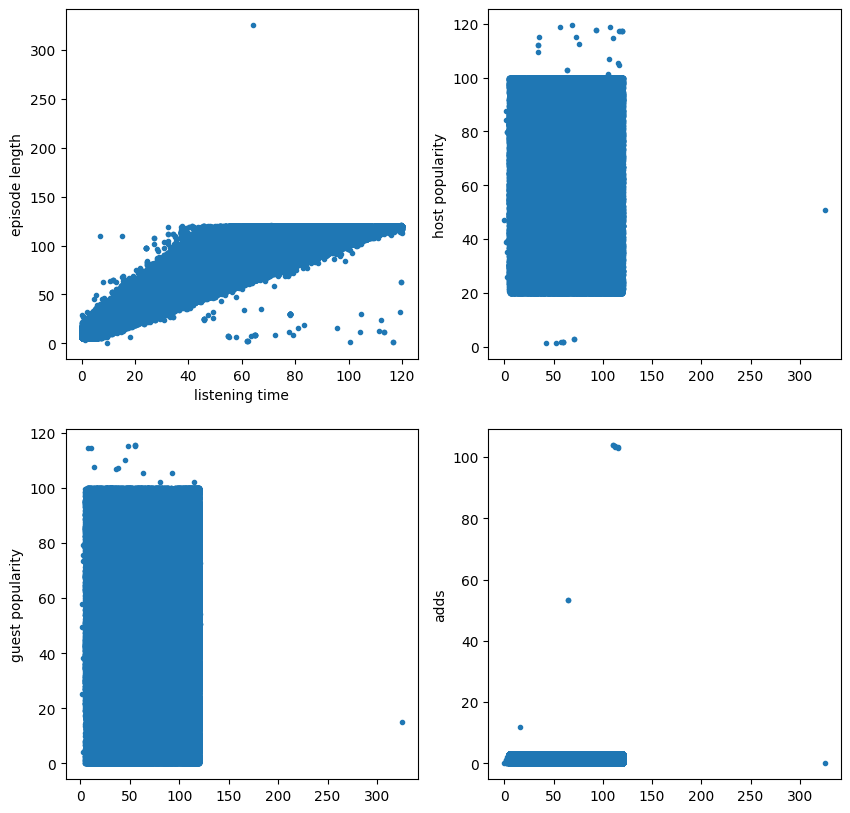

In [10]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.scatter(data.Listening_Time_minutes, data.Episode_Length_minutes, marker='.')
plt.xlabel("listening time")
plt.ylabel("episode length")

plt.subplot(2,2,2)
plt.scatter(data.Episode_Length_minutes, data.Host_Popularity_percentage, marker='.')
plt.ylabel('host popularity')

plt.subplot(2,2,3)
plt.scatter(data.Episode_Length_minutes, data.Guest_Popularity_percentage, marker='.')
plt.ylabel('guest popularity')

plt.subplot(2,2,4)
plt.scatter(data.Episode_Length_minutes, data.Number_of_Ads, marker='.')
plt.ylabel('adds')

Text(0, 0.5, 'id')

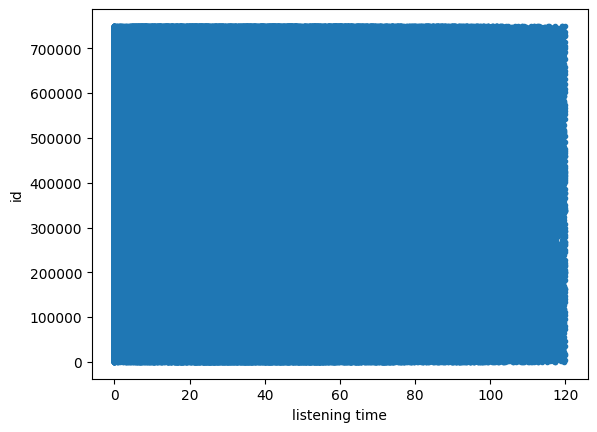

In [9]:
plt.scatter(data.Listening_Time_minutes, data.id, marker='.')
plt.xlabel("listening time")
plt.ylabel("id")

In [15]:
avg_time_by_podcast = pd.pivot_table(data, ["Listening_Time_minutes"], ["Podcast_Name"], aggfunc=["max", "min", "mean"])
avg_time_by_podcast

,max,min,mean
,Listening_Time_minutes,Listening_Time_minutes,Listening_Time_minutes
Podcast_Name,,,
Athlete's Arena,119.74,0.0,46.634791
Brain Boost,119.74,0.0,44.409651
Business Briefs,119.66,0.0,47.121103
Business Insights,119.44,0.0,44.213344
Comedy Corner,119.80,0.0,43.930314
Crime Chronicles,119.90,0.0,47.678948
Criminal Minds,119.80,0.0,43.548438
Current Affairs,119.80,0.0,43.534962


In [20]:
data.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

<Axes: title={'center': 'Listening_Time_minutes'}, xlabel='Episode_Sentiment'>

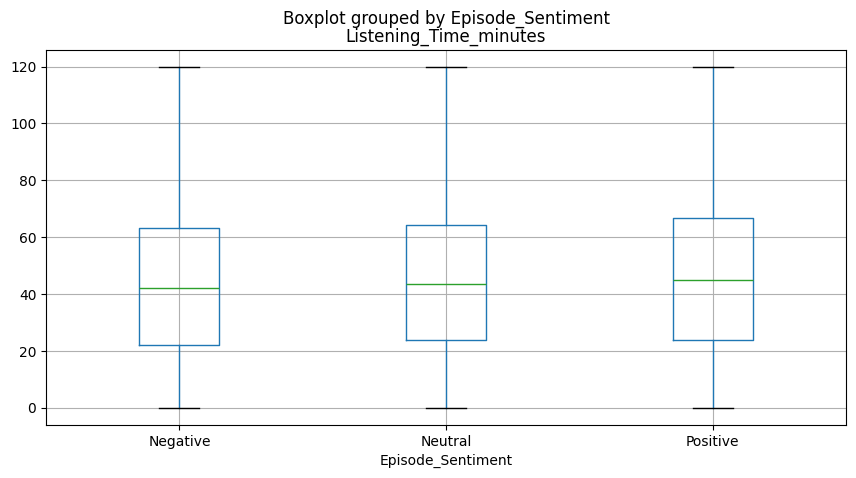

In [24]:
data.boxplot(column="Listening_Time_minutes", by='Episode_Sentiment', figsize=(10,5))

Text(0.5, 0, 'listening time')

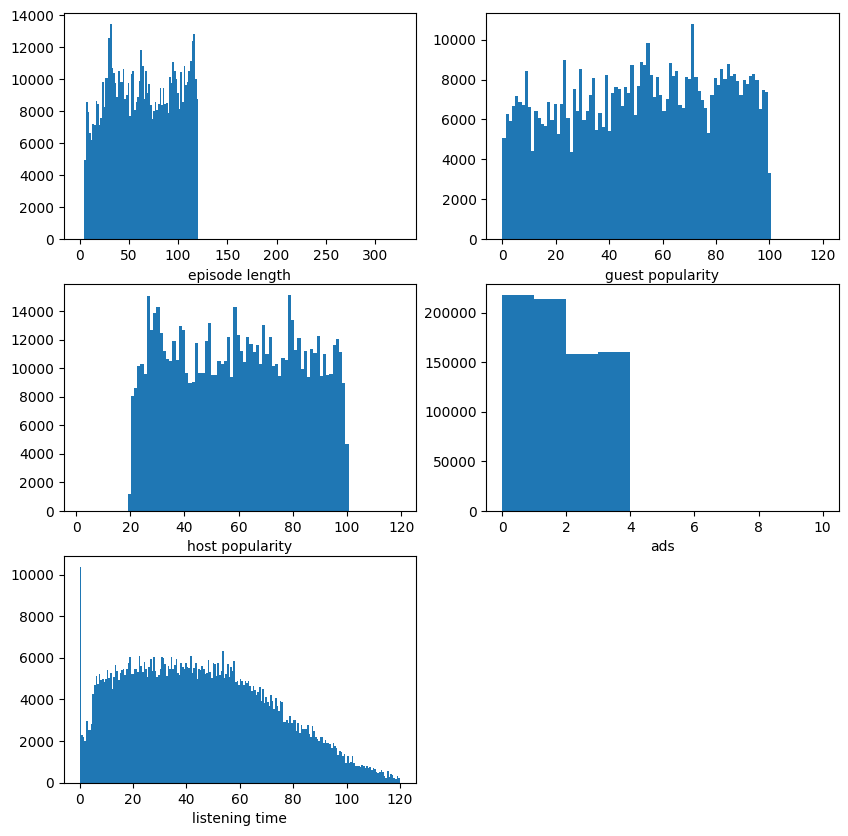

In [53]:
plt.figure(figsize=(10,10))


plt.subplot(3,2,1)
plt.hist(x=data.Episode_Length_minutes, bins=200)
plt.xlabel('episode length')

plt.subplot(3,2,2)
plt.hist(x=data.Guest_Popularity_percentage, bins=100)
plt.xlabel('guest popularity')

plt.subplot(3,2,3)
plt.hist(x=data.Host_Popularity_percentage, bins=100)
plt.xlabel('host popularity')

plt.subplot(3,2,4)
plt.hist(data.Number_of_Ads, range=(0,10), bins=10)
plt.xlabel('ads')

plt.subplot(3,2,5)
plt.hist(data.Listening_Time_minutes, bins=200)
plt.xlabel('listening time')

## Takeaways -
-   popularity percentages have records exceeding 100, need to be trimmed
-   deal outliers in podcast_listening_time feature
-   only episode_length and guest_popularity have missing values. While episode_length is a good candidate for mean imputation, guest_popularity can be imputed with median/mode popularity
